In [1]:
import pandas as pd
from AdalineGD import AdalineGD
import matplotlib.pyplot as plt
import numpy as np
from plot_decision_region import plot_decision_region

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)
x = df.iloc[0:100, [0, 2]].values

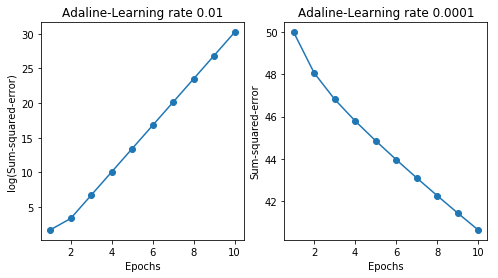

In [3]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(x, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline-Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(x, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline-Learning rate 0.0001')

plt.show()

从上面可以看出,左图的损失函数在不断的吧变大,有图的损失函数虽然在变小但是下降幅度太小了

下面先对特征进行标准化

In [4]:
x_std = np.copy(x)
x_std[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x_std[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

In [5]:
# 标准化后再训练模型,学习率为0.01
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(x_std, y)

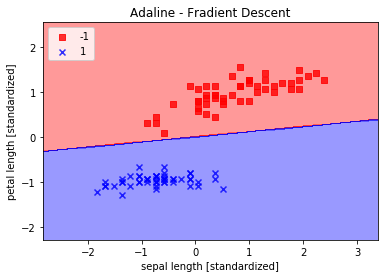

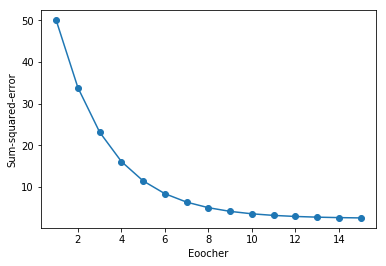

In [18]:
# 可视化决策界和算法学习情况
plot_decision_region(x_std, y, classifier=ada)

plt.title('Adaline - Fradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()


plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Eoocher')
plt.ylabel('Sum-squared-error')
plt.show()

标准化之后算法收敛了